[('q', 0.06315789473684211), ('w', 0.08421052631578947), ('e', 0.15789473684210525), ('r', 0.2736842105263158), ('t', 0.22105263157894736), ('y', 0.10526315789473684), ('u', 0.05263157894736842), ('i', 0.042105263157894736)]


<IPython.core.display.Javascript object>


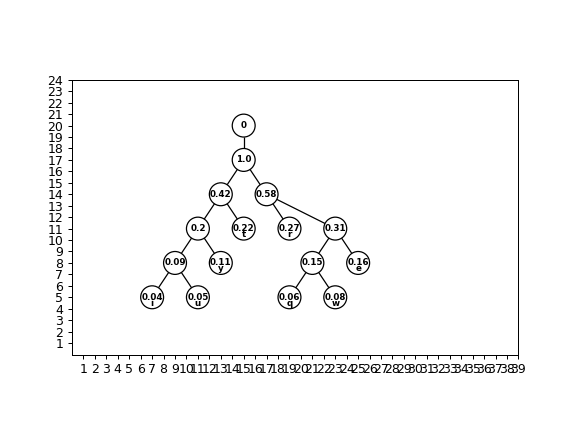

In [9]:
from cmath import atan
from glob import glob
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random 

import math

from numpy import array
%matplotlib nbagg
out1 = widgets.Output()
display(out1)
def inter_points(rad,x1,y1,x2,y2): 
    phi = math.atan2(y2-y1, x2-x1)
    x = x1 + rad * math.cos(phi)
    y = y1 + rad * math.sin(phi)
    return (x,y)
#punto medio entre dos puntos pero con una separaciÃ³n de s, una fraccion de la linae(frac)
def punto_medio(x1,y1,x2,y2,s,fra): 
    dx = x1 - x2 
    dy = y1 - y2 
    ang = (math.pi/2 if dy > 0 else (3*math.pi)/2) if dx == 0 else math.atan(dy/dx)
    ang = ang + 2* math.pi if ang < 0 else ang
    x = math.sqrt((x1- x2)**2 + (y1 - y2)**2)*fra
    y = s 
    xp = x*math.cos(ang) - y*math.sin(ang)
    yp = x*math.sin(ang) + y*math.cos(ang)
    ##lleguÃ© a la conclusiÃ³n que tienes que trasladarlo a el que tiene la menor x 
    xp = xp + (x1 if x1 < x2 else x2) 
    yp = yp + (y1 if x1 < x2 else y2 )
    return (xp,yp)

class Arbol: 
    raiz = None 
    vertices = None 
    aristas = None 
    n = 0 
    n_nodos = 0 
    def __init__(self):
        self.raiz = Vertice()
        #es una lista de vertices par 
        self.vertices =  dict()
        self.vertices[0] = self.raiz 
        self.n_nodos = 1  
        self.aristas  = dict()

class Vertice: 
    circ = None 
    anotc = None 
    padre = None
    hijos = None
    valor =None
    def __init__(self): 
        self.hijos = []
class Arista: 
    linea = None
    anot = None
def dfs(n,arbol,prof,y): 
    if(not n.hijos): 
        prof[n] = y 
    for i in n.hijos : 
        dfs(i,arbol,prof,y - 4*env.vars['rad'])

def prof_hojas(arbol): 
    prof = dict() 
    dfs(arbol.raiz,arbol,prof,0) 
    return prof
def entre_hijos(n):
    arbol = env.vars['arbol']
    ph = n.hijos[0]
    uh =  n.hijos[-1]
    xp,_ = ph.circ.get_center()
    xu,_ = uh.circ.get_center()
    return (xp + xu) /2 
def limpiar_arbol(): 
    arbol = env.vars['arbol']
    for _,v in arbol.vertices.items(): 
        if(v.circ != None): 
            v.circ.set(visible = False)
        v.circ = None 
        for u in v.hijos: 
            if((v,u) in arbol.aristas): 
                if(arbol.aristas[(v,u)].linea != None): 
                    arbol.aristas[(v,u)].linea.set(visible = False)
                    arbol.aristas[(v,u)].anot.set(visible = False)
                arbol.aristas[(v,u)].linea = None 
def dibujar_arbol():  
    limpiar_arbol() 
    rad = env.vars['rad']
    arbol = env.vars['arbol']
    prof_h = prof_hojas(arbol) 
    cola = [] 
    x = 0
    for i,v in arbol.vertices.items(): 
        v.circ = None 
    for h,p in prof_h.items():
        cola.append((h,x,p))
        x = x + 4*rad
    hijos_proc = dict()
    while(cola): 
        n,x,y = cola[0]
        cola.pop(0)
        c = Circle((x,y),radius = rad,facecolor = 'white',edgecolor = 'black')
        n.anot =  env.vars['ax'].text(x, y,n.valor,fontsize = 9,ha='center', va='center') 
        n.circ = c  
        env.vars['ax'].add_patch(c)
        p = n.padre
        if(p != None): 
            if(p not in hijos_proc): 
                hijos_proc[p] = 0 
            hijos_proc[p] = hijos_proc[p] + 1
            if(hijos_proc[p] == len(p.hijos)): 
                cola.append((p,entre_hijos(p),y + 4*rad)) 
    for i,v in arbol.vertices.items(): 
        for h in v.hijos:  
            xi,yi = v.circ.get_center()
            xj,yj = h.circ.get_center()
            linea = PathPatch(Path([inter_points(env.vars['rad'],xi,yi,xj,yj),inter_points(env.vars['rad'],xj,yj,xi,yi)]), facecolor='none', edgecolor='black')
            env.vars['ax'].add_patch(linea)
            if((v,h) not in arbol.aristas): 
                arbol.aristas[(v,h)] = Arista() 
            arbol.aristas[(v,h)].linea = linea
    env.vars['ax'].relim()
    env.vars['ax'].autoscale_view()
#frecuencias es un diccionario de letra a un numero

class Env:
    vars = dict()  

class Ejecucion:  
    def obtener_frecuencias(self): 
        cad = "hfjadhfjhadkfhadjfhakjdhfjkadh"
        freq = dict() 
        for c in cad: 
            if(c not in freq): 
                freq[c] = 0
            freq[c] = freq[c] + 1
        n = len(cad) 
        for c in freq.keys(): 
            freq[c] = float("{:.2f}".format(freq[c]/n)) 
        return freq
    def crear_arbol_inicial(self,frecuencias): 
        arbol = env.vars['arbol']
        for l,f in frecuencias.items():
            v = Vertice()  
            v.valor = f 
            v.padre = arbol.raiz
            arbol.raiz.hijos.append(v) 
    def config_imagen(self): 
        plt.gca().set_aspect('equal', adjustable='box')

    def siguiente_paso(self):
        print('ejecuta el siguiente paso ahora')
    @out1.capture()
    def teclas_handler(self,event): 
        if(event.key == 'n'): 
            self.siguiente_paso() 
        if(event.key == '-'):
            self.zoom_menos()  
        elif(event.key == '+'): 
            self.zoom_mas() 
    def zoom_mas(self): 
        x,y = env.vars['fig'].get_size_inches()
        env.vars['fig'].set_size_inches(x+1,y+1)
    def zoom_menos(self): 
        x,y = env.vars['fig'].get_size_inches()
        env.vars['fig'].set_size_inches(x-1,y-1)
    def config_teclas(self): 
        env.vars['cid_t'] = env.vars['fig'].canvas.mpl_connect('key_press_event', self.teclas_handler)
    def __init__(self): 
        self.config_imagen()
        self.config_teclas()
        self.crear_arbol_inicial(self.obtener_frecuencias())
        dibujar_arbol() 
env = Env() 
env.vars['arbol'] = Arbol() 
env.vars['fig'],env.vars['ax'] = plt.subplots() 
env.vars['rad'] = 1 
env.vars['cid_t'] = None
env.vars['e1'] = Ejecucion() 
